In [1]:
import os
import pandas as pd

import stylia
import matplotlib.pyplot as plt
import seaborn as sns

import stylia as st
from stylia import (
    ONE_COLUMN_WIDTH,
    TWO_COLUMNS_WIDTH,
    NamedColorMaps,
    NamedColors,
    ContinuousColorMap,
)

data_dir = "../data/"


def load_data(model_id):
    df_0 = pd.read_csv(os.path.join(data_dir, "processed","all_molecules.csv"))
    df_1 = pd.read_csv(os.path.join(data_dir,"ersilia-models", "all_smiles_{0}.csv".format(model_id)))
    columns = list(df_1.columns)[2:]
    return pd.concat([df_0, df_1[columns]], axis=1)


df = pd.read_csv(os.path.join(data_dir,"processed", "all_molecules.csv"))
colors = NamedColors()
npc = colors.get("green")
spc = colors.get("purple")

Text(0.5, 1.0, '')

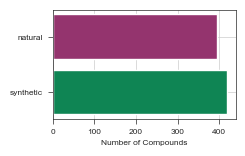

In [5]:
fig, axs = stylia.create_figure(
    1, 1, width=TWO_COLUMNS_WIDTH / 3, height=TWO_COLUMNS_WIDTH / 5
)
category_counts = df["category"].value_counts()
ax = axs.next()
ax.barh(category_counts.index, category_counts.values, color=[npc, spc])
ax.set_ylabel("")
ax.set_xlabel("Number of Compounds")
ax.set_title("")

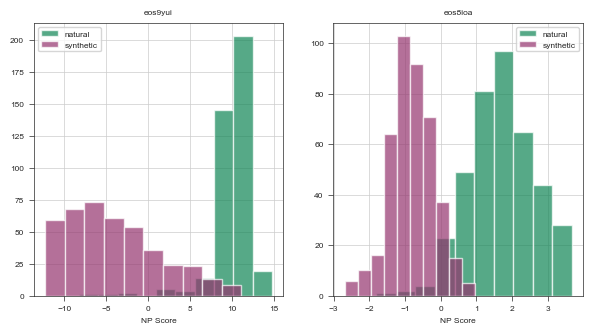

In [8]:
df = load_data("eos9yui")  # NP likeness
df_ = load_data("eos8ioa")  # NP score
fig, axs = stylia.create_figure(
    1, 2, width=TWO_COLUMNS_WIDTH, height=0.5 * TWO_COLUMNS_WIDTH
)
ax = axs.next()
ax.hist(df[df["category"] == "natural"]["np_score"], alpha=0.7, label="natural", color=npc)
ax.hist(
    df[df["category"] == "synthetic"]["np_score"], alpha=0.7, label="synthetic", color=spc
)
ax.set_title("eos9yui")
ax.set_xlabel("NP Score")
ax.set_ylabel("")
ax.legend()
ax = axs.next()
ax.hist(
    df_[df_["category"] == "natural"]["nplikeness"],
    alpha=0.7,
    label="natural",
    color=npc,
)
ax.hist(
    df_[df_["category"] == "synthetic"]["nplikeness"],
    alpha=0.7,
    label="synthetic",
    color=spc,
)
ax.set_title("eos8ioa")
ax.set_xlabel("NP Score")
ax.set_ylabel("")
ax.legend()

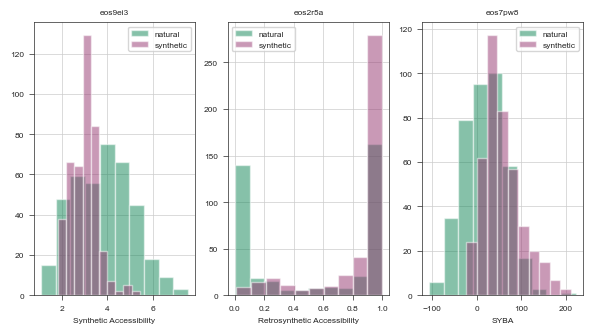

In [13]:
df1 = load_data("eos9ei3")  # SA score
df2 = load_data("eos2r5a")  # RA Score
df3 = load_data("eos7pw8")  # SYBA
fig, axs = stylia.create_figure(
    1, 3, width=TWO_COLUMNS_WIDTH, height=0.5 * TWO_COLUMNS_WIDTH
)
ax = axs.next()
ax.hist(
    df1[df1["category"] == "natural"]["sa_score"], alpha=0.5, label="natural", color=npc
)
ax.hist(
    df1[df1["category"] == "synthetic"]["sa_score"],
    alpha=0.5,
    label="synthetic",
    color=spc,
)
ax.set_title("eos9ei3")
ax.set_xlabel("Synthetic Accessibility")
ax.set_ylabel("")
ax.legend()
ax = axs.next()
ax.hist(
    df2[df2["category"] == "natural"]["ra_score"], alpha=0.5, label="natural", color=npc
)
ax.hist(
    df2[df2["category"] == "synthetic"]["ra_score"],
    alpha=0.5,
    label="synthetic",
    color=spc,
)
ax.set_title("eos2r5a")
ax.set_xlabel("Retrosynthetic Accessibility")
ax.set_ylabel("")
ax.legend()
ax = axs.next()
ax.hist(
    df3[df3["category"] == "natural"]["syba_score"], alpha=0.5, label="natural", color=npc
)
ax.hist(
    df3[df3["category"] == "synthetic"]["syba_score"],
    alpha=0.5,
    label="synthetic",
    color=spc,
)
ax.set_title("eos7pw8")
ax.set_xlabel("SYBA")
ax.set_ylabel("")
ax.legend()

/home/gturon/miniconda3/envs/chem/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/gturon/miniconda3/envs/chem/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/gturon/miniconda3/envs/chem/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/gturon/miniconda3/envs/chem/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/gturon/miniconda3/envs/chem/lib/python3.11/site-packages/sklearn/utils/d

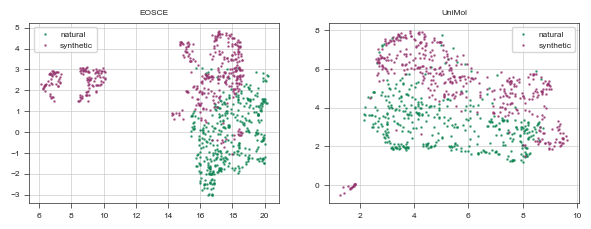

In [ ]:
import umap
import numpy as np

fig, axs = stylia.create_figure(
    1, 2, width=TWO_COLUMNS_WIDTH, height=0.33 * TWO_COLUMNS_WIDTH
)

ax = axs.next()
df = load_data("eos2gw4")
df = df.dropna()
descs = df.iloc[:, 4:]
descs_array = descs.values
descs_nat = df[df["category"] == "natural"].iloc[:, 4:]
descs_syn = df[df["category"] == "synthetic"].iloc[:, 4:]
umap_trn = umap.UMAP(n_neighbors=50)
all_umap = umap_trn.fit_transform(descs_array)
np_umap = umap_trn.transform(descs_nat)
syn_umap = umap_trn.transform(descs_syn)
ax.scatter(
    np.transpose(np_umap)[0],
    np.transpose(np_umap)[1],
    alpha=0.7,
    label="natural",
    color=npc,
    s=0.7,
)
ax.scatter(
    np.transpose(syn_umap)[0],
    np.transpose(syn_umap)[1],
    alpha=0.7,
    label="synthetic",
    color=spc,
    s=0.7,
)
ax.set_title("EOSCE")
ax.set_xlabel("")
ax.set_ylabel("")
ax.legend()

ax = axs.next()
df = load_data("eos39co")
df = df.dropna()
descs = df.iloc[:, 4:]
descs_array = descs.values
descs_nat = df[df["category"] == "natural"].iloc[:, 4:]
descs_syn = df[df["category"] == "synthetic"].iloc[:, 4:]
umap_trn = umap.UMAP(n_neighbors=50)
all_umap = umap_trn.fit_transform(descs_array)
np_umap = umap_trn.transform(descs_nat)
syn_umap = umap_trn.transform(descs_syn)
ax.scatter(
    np.transpose(np_umap)[0],
    np.transpose(np_umap)[1],
    alpha=0.7,
    label="natural",
    color=npc,
    s=0.7,
)
ax.scatter(
    np.transpose(syn_umap)[0],
    np.transpose(syn_umap)[1],
    alpha=0.7,
    label="synthetic",
    color=spc,
    s=0.7,
)
ax.set_title("UniMol")
ax.set_xlabel("")
ax.set_ylabel("")
ax.legend()

Text(0, 0.5, '')

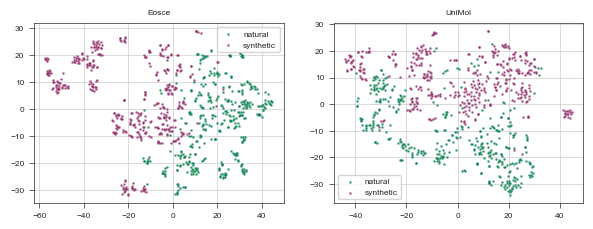

In [18]:
from sklearn.manifold import TSNE

fig, axs = stylia.create_figure(
    1, 2, width=TWO_COLUMNS_WIDTH, height=0.33 * TWO_COLUMNS_WIDTH
)

ax = axs.next()
df = load_data("eos2gw4")
df = df.dropna()
df = df.reset_index(drop=True)
descs = df.iloc[:, 4:]
descs_array = descs.values
descs_nat = df[df["category"] == "natural"].iloc[:, 4:]
descs_syn = df[df["category"] == "synthetic"].iloc[:, 4:]
tsne = TSNE(n_components=2, perplexity=30)
tsne_results = tsne.fit_transform(descs_array)
nat_idx = df[df["category"] == "natural"].index
syn_idx = df[df["category"] == "synthetic"].index
tsne_nat = tsne_results[nat_idx]
tsne_syn = tsne_results[syn_idx]
ax.scatter(tsne_nat[:, 0], tsne_nat[:, 1], alpha=0.7, label="natural", color=npc, s=0.7)
ax.scatter(
    tsne_syn[:, 0], tsne_syn[:, 1], alpha=0.7, label="synthetic", color=spc, s=0.7
)
ax.legend()
ax.set_title("Eosce")
ax.set_xlabel("")
ax.set_ylabel("")

ax = axs.next()
df = load_data("eos39co")
df = df.dropna()
df = df.reset_index(drop=True)
descs = df.iloc[:, 4:]
descs_array = descs.values
descs_nat = df[df["category"] == "natural"].iloc[:, 4:]
descs_syn = df[df["category"] == "synthetic"].iloc[:, 4:]
tsne = TSNE(n_components=2, perplexity=30)
tsne_results = tsne.fit_transform(descs_array)
nat_idx = df[df["category"] == "natural"].index
syn_idx = df[df["category"] == "synthetic"].index
tsne_nat = tsne_results[nat_idx]
tsne_syn = tsne_results[syn_idx]
ax.scatter(tsne_nat[:, 0], tsne_nat[:, 1], alpha=0.7, label="natural", color=npc, s=0.7)
ax.scatter(
    tsne_syn[:, 0], tsne_syn[:, 1], alpha=0.7, label="synthetic", color=spc, s=0.7
)
ax.legend()
ax.set_title("UniMol")
ax.set_xlabel("")
ax.set_ylabel("")

/home/gturon/miniconda3/envs/chem/lib/python3.11/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(
/home/gturon/miniconda3/envs/chem/lib/python3.11/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(
/home/gturon/miniconda3/envs/chem/lib/python3.11/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(
/home/gturon/miniconda3/envs/chem/lib/python3.11/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


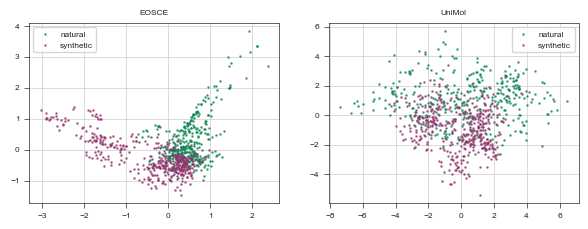

In [4]:
from sklearn.decomposition import PCA
import numpy as np

fig, axs = stylia.create_figure(
    1, 2, width=TWO_COLUMNS_WIDTH, height=0.33 * TWO_COLUMNS_WIDTH
)

ax = axs.next()
df = load_data("eos2gw4")
df = df.dropna()
descs = df.iloc[:, 4:]
descs_array = descs.values
descs_nat = df[df["category"] == "natural"].iloc[:, 4:]
descs_syn = df[df["category"] == "synthetic"].iloc[:, 4:]
pca_trn = PCA(n_components=2)
all_pca = pca_trn.fit_transform(descs_array)
np_pca = pca_trn.transform(descs_nat)
syn_pca = pca_trn.transform(descs_syn)
ax.scatter(
    np.transpose(np_pca)[0],
    np.transpose(np_pca)[1],
    alpha=0.7,
    label="natural",
    color=npc,
    s=0.7,
)
ax.scatter(
    np.transpose(syn_pca)[0],
    np.transpose(syn_pca)[1],
    alpha=0.7,
    label="synthetic",
    color=spc,
    s=0.7,
)
ax.set_title("EOSCE")
ax.set_xlabel("")
ax.set_ylabel("")
ax.legend()

ax = axs.next()
df = load_data("eos39co")
df = df.dropna()
descs = df.iloc[:, 4:]
descs_array = descs.values
descs_nat = df[df["category"] == "natural"].iloc[:, 4:]
descs_syn = df[df["category"] == "synthetic"].iloc[:, 4:]
pca_trn = PCA(n_components=2)
all_pca = pca_trn.fit_transform(descs_array)
np_pca = pca_trn.transform(descs_nat)
syn_pca = pca_trn.transform(descs_syn)
ax.scatter(
    np.transpose(np_pca)[0],
    np.transpose(np_pca)[1],
    alpha=0.7,
    label="natural",
    color=npc,
    s=0.7,
)
ax.scatter(
    np.transpose(syn_pca)[0],
    np.transpose(syn_pca)[1],
    alpha=0.7,
    label="synthetic",
    color=spc,
    s=0.7,
)
ax.set_title("UniMol")
ax.set_xlabel("")
ax.set_ylabel("")
ax.legend()